# CM4125 Week 2: Data Acquisition and Pre-processing

In [1]:
# This cell is used to change parameter of the rise slideshow, 
# such as the window width/height and enabling a scroll bar
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'width': 1700,
              'height': 800,
              'scroll': True,
})
# This code lets you colour the axis lines white
from matplotlib import style
style.use('dark_background')
# This code allows you to show images within the notebook
%matplotlib inline

## New Resources Tab

## Menti Poll

## [LATEST EXCEL FAIL!](https://www.bbc.com/news/technology-54423988)

## Lecture objectives

1) Understand how we define data (for the purpose of this module) and where to get it

2) Learn different methods to import/export data into practical representations

3) Apply basic pre-processing techniques to clean data

## What is data (for data viz)?

Information or characteristics collected through observation or experimentation

Using a tabular approach...

Each entry/observation corresponds to a `row`

Each feature/characteristic corresponds to a `column`

## Where to get data from?

### "From a friend"


We are given access to a file or register containing the data

There are many formats, but mostly we will deal with:

    .csv
    .tsv
    .txt
    .xlsx
    .json

In [2]:
## Example: Reading a .csv file into python
## This file contains the age and height of some participants
import pandas as pd
df = pd.read_csv('data.csv')
df

,Col 1,Col 2,Col 3
0,Nick,21,1.85
1,Chris,29,1.79
2,Tim,28,1.75
3,Ron,34,1.81
4,Monica,35,1.69
5,Cassandra,21,1.66


If you think about it, multimedia could also fit in this definition! 

For instance, an image repository would also be data!

How would you contain images in a tabular way?

First of all, consider the fact that an image is a **collection of pixels**

For black/white images, each pixel can take a value from 0 (black) to 255 (white) 

<img src="https://www.dropbox.com/s/j2lf9txbckldlie/fig2.jpg?raw=1" align="center"/>

You can import an image in Python as an `array` of pixels...

In [3]:
# Importing an image from a folder...
import cv2
import numpy as np
import matplotlib.pyplot as plt

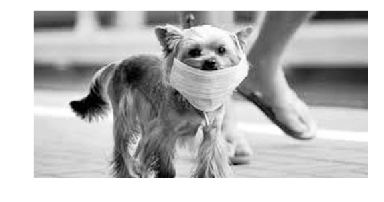

In [4]:
# Load the image in grayscale
dog = cv2.imread('imgs/dog.jpg', 0)
# Show the image
plt.imshow(dog,cmap='Greys_r')

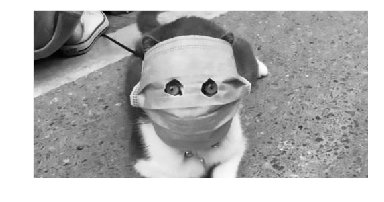

In [5]:
# Load the image in grayscale
cat = cv2.imread('imgs/cat.jpg', 0)
# Show the image
plt.imshow(cat,cmap='Greys_r')

In [6]:
# Find the size of dog and cat
print('Dog img size', dog.shape)

print('Cat img size', cat.shape)


Dog img size (250, 500)
Cat img size (250, 500)


In [7]:
# Reshape both images so that they are FLATTENED
flattened_dog = dog.flatten()
flattened_cat = cat.flatten()
print('Dog flat size', flattened_dog.shape)
print('Cat flat size', flattened_cat.shape)

Dog flat size (125000,)
Cat flat size (125000,)


In [8]:
# Create a table where the first row has the dog and the second one has the cat
image_repository = [flattened_dog, flattened_cat]
print(image_repository)

[array([101, 101, 101, ..., 182, 182, 182], dtype=uint8), array([104,  60,  61, ..., 120, 110,  98], dtype=uint8)]


That looks a little weird doesn't it? Let's convert it into a dataframe

In [9]:
image_dataframe = pd.DataFrame(image_repository)
image_dataframe

,0,1,2,3,4,5,6,7,8,9,...,124990,124991,124992,124993,124994,124995,124996,124997,124998,124999
0,101,101,101,101,102,102,102,102,101,101,...,177,175,174,175,177,179,182,182,182,182
1,104,60,61,61,65,59,64,66,65,65,...,126,129,130,130,129,129,126,120,110,98


In a data frame like this, you would expect that each observation is **categorised**

Usually, the last column contains the **class/target/label** of the observation

There are many ways to get it automatically (e.g. from the file name or the folder where it is). In this case, we'll add it ourselves

In [10]:
image_dataframe['class'] = ['Dog','Cat']
image_dataframe

,0,1,2,3,4,5,6,7,8,9,...,124991,124992,124993,124994,124995,124996,124997,124998,124999,class
0,101,101,101,101,102,102,102,102,101,101,...,175,174,175,177,179,182,182,182,182,Dog
1,104,60,61,61,65,59,64,66,65,65,...,129,130,130,129,129,126,120,110,98,Cat


### Online repos

* There is a huge amount of free data out there!
* Just be careful where you get it!
* Websites such as [Kaggle](https://www.kaggle.com) or [Keel](https://sci2s.ugr.es/keel/datasets.php) contain thousands of examples that you can download and import to your preferred tool
* Sometimes they even contain ways to connect to your data in faster and more secure ways

![Fig. 2](https://www.dropbox.com/s/6de9dh4v7rzkura/fig1.jpg?raw=1)

### Modules and packages

Languages such as Python and R already contain some preloaded data repositories

They are sometimes in weird shapes and forms

Nonetheless, they are good to start experimenting!

In [11]:
## Loading the IRIS dataset from the SCIKIT LEARN module
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Online (but not in repos!)

#### Web scraping

The extraction of data from a website by programmatic means

Used when...
    * No API
    * No published structure dataset
    * Multiple sources to be combined
    * Scheduled sampling of data at given times

Consider the legal barriers!
    * Some sites don't want to share data so easily! (e.g. BBC, City Council, Wikipedia, etc.)
    * Licensing or permission may be given by copyright, creative commons or open gov license

To scrape data, the first thing we need is a target website

Let's use [this one](https://www.transport.gov.scot/publication/key-reported-road-casualties-scotland-2018/3-reported-numbers-of-accidents-table-1) as an example

This page contains the number of fatalities in road accidents in Scotland from 1970 to 2018

In Python, I can use the `requests` and the `Beautiful Soup` libraries 

In [12]:
# Import the necessary packages
import requests
from bs4 import BeautifulSoup

In [13]:
# Specify the target

url = "https://www.transport.gov.scot/publication/key-reported-road-casualties-scotland-2018/3-reported-numbers-of-accidents-table-1"

In [14]:
# Now, we do the request
r = requests.get(url)
print(r, type(r))

<Response [200]> <class 'requests.models.Response'>


In [15]:
# We can see the content of our request

print(r.content)

b'\r\n\r\n<!DOCTYPE html>\r\n\r\n<html lang="en" class="">\r\n\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\r\n    <link rel="stylesheet" href="/content/css/styles.css">\r\n    <script>document.documentElement.className = document.documentElement.className.split(\'no-js\').join(\'\');</script>\r\n    <meta name="apple-mobile-web-app-status-bar-style" content="black-translucent">\r\n    <meta name="apple-touch-fullscreen" content="YES">\r\n    \r\n    \r\n<title>3. Reported numbers of Accidents (Table 1)</title>\r\n<meta name="description" content="" />\r\n<meta property="og:title" content="" />\r\n<meta property="og:description" content="" />\r\n\r\n\r\n<meta name="twitter:card" content="summary_large_image"/>\r\n<meta name="twitter:site" content="@transcotland"/>\r\n<meta name="twitter:title" content=""/>\r\n<meta name="twitter:descripti

To work with this request, we need the `Beautiful Soup` package 

We first create a `soup` object and pass the contents of `r` to it

In [16]:
soup = BeautifulSoup(r.content,"html.parser")
print(soup)


<!DOCTYPE html>

<html class="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<link href="/content/css/styles.css" rel="stylesheet"/>
<script>document.documentElement.className = document.documentElement.className.split('no-js').join('');</script>
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<meta content="YES" name="apple-touch-fullscreen"/>
<title>3. Reported numbers of Accidents (Table 1)</title>
<meta content="" name="description">
<meta content="" property="og:title">
<meta content="" property="og:description">
<meta content="summary_large_image" name="twitter:card"/>
<meta content="@transcotland" name="twitter:site"/>
<meta content="" name="twitter:title"/>
<meta content="" name="twitter:description"/>
<link href="https://www.transport.gov.scot/publication/key-reported-road-casualties-scotland-2018/3-reported-

Keep in mind that we are looking for the *tabular data*

* Just like when you **inspect** a website:
    * Right-click, `View Page Sources`
    * `View` $\rightarrow$ `Developer` $\rightarrow$ `Inspect Elements`

In [17]:
# Option 1
table_v1 = soup.find('table')

print(table_v1)

<table border="1" cellpadding="5" cellspacing="1" id="Table1">
<caption>
          Table 1: Injury Road Accidents by Severity, 1970 –
          2018
        </caption>
<thead>
<tr>
<th> </th>
<th>
<p>Fatal</p>
</th>
<th>
<p>Serious</p>
</th>
<th>
<p>Fatal and Serious</p>
</th>
<th>
<p>Slight</p>
</th>
<th>
<p>All</p>
</th>
</tr>
</thead>
<tbody>
<tr>
<th>
<p>1970</p>
</th>
<td>
<p>758</p>
</td>
<td>
<p>7,860</p>
</td>
<td>
<p>8,618</p>
</td>
<td>
<p>13,515</p>
</td>
<td>
<p>22,133</p>
</td>
</tr>
<tr>
<th>
<p>1975</p>
</th>
<td>
<p>699</p>
</td>
<td>
<p>6,912</p>
</td>
<td>
<p>7,611</p>
</td>
<td>
<p>13,041</p>
</td>
<td>
<p>20,652</p>
</td>
</tr>
<tr>
<th>
<p>1980</p>
</th>
<td>
<p>644</p>
</td>
<td>
<p>7,218</p>
</td>
<td>
<p>7,862</p>
</td>
<td>
<p>13,926</p>
</td>
<td>
<p>21,788</p>
</td>
</tr>
<tr>
<th>
<p>1985</p>
</th>
<td>
<p>550</p>
</td>
<td>
<p>6,507</p>
</td>
<td>
<p>7,057</p>
</td>
<td>
<p>13,587</p>
</td>
<td>
<p>20,644</p>
</td>
</tr>
<tr>
<th>
<p>1990</p>
</th>
<td>
<p>

In [18]:
# Option 2
table_v2 = soup.find('table', 
                     id='Table1')
print(table_v2)

<table border="1" cellpadding="5" cellspacing="1" id="Table1">
<caption>
          Table 1: Injury Road Accidents by Severity, 1970 –
          2018
        </caption>
<thead>
<tr>
<th> </th>
<th>
<p>Fatal</p>
</th>
<th>
<p>Serious</p>
</th>
<th>
<p>Fatal and Serious</p>
</th>
<th>
<p>Slight</p>
</th>
<th>
<p>All</p>
</th>
</tr>
</thead>
<tbody>
<tr>
<th>
<p>1970</p>
</th>
<td>
<p>758</p>
</td>
<td>
<p>7,860</p>
</td>
<td>
<p>8,618</p>
</td>
<td>
<p>13,515</p>
</td>
<td>
<p>22,133</p>
</td>
</tr>
<tr>
<th>
<p>1975</p>
</th>
<td>
<p>699</p>
</td>
<td>
<p>6,912</p>
</td>
<td>
<p>7,611</p>
</td>
<td>
<p>13,041</p>
</td>
<td>
<p>20,652</p>
</td>
</tr>
<tr>
<th>
<p>1980</p>
</th>
<td>
<p>644</p>
</td>
<td>
<p>7,218</p>
</td>
<td>
<p>7,862</p>
</td>
<td>
<p>13,926</p>
</td>
<td>
<p>21,788</p>
</td>
</tr>
<tr>
<th>
<p>1985</p>
</th>
<td>
<p>550</p>
</td>
<td>
<p>6,507</p>
</td>
<td>
<p>7,057</p>
</td>
<td>
<p>13,587</p>
</td>
<td>
<p>20,644</p>
</td>
</tr>
<tr>
<th>
<p>1990</p>
</th>
<td>
<p>

In [19]:
# You can print properties of the tables you find, such as the caption
print(table_v1.caption)

<caption>
          Table 1: Injury Road Accidents by Severity, 1970 –
          2018
        </caption>


In [20]:
# Now we can put together a command that finds the table, it's body and all entries (tr)
rows = soup.find('table').find('tbody').find_all('tr')
print(rows)

[<tr>
<th>
<p>1970</p>
</th>
<td>
<p>758</p>
</td>
<td>
<p>7,860</p>
</td>
<td>
<p>8,618</p>
</td>
<td>
<p>13,515</p>
</td>
<td>
<p>22,133</p>
</td>
</tr>, <tr>
<th>
<p>1975</p>
</th>
<td>
<p>699</p>
</td>
<td>
<p>6,912</p>
</td>
<td>
<p>7,611</p>
</td>
<td>
<p>13,041</p>
</td>
<td>
<p>20,652</p>
</td>
</tr>, <tr>
<th>
<p>1980</p>
</th>
<td>
<p>644</p>
</td>
<td>
<p>7,218</p>
</td>
<td>
<p>7,862</p>
</td>
<td>
<p>13,926</p>
</td>
<td>
<p>21,788</p>
</td>
</tr>, <tr>
<th>
<p>1985</p>
</th>
<td>
<p>550</p>
</td>
<td>
<p>6,507</p>
</td>
<td>
<p>7,057</p>
</td>
<td>
<p>13,587</p>
</td>
<td>
<p>20,644</p>
</td>
</tr>, <tr>
<th>
<p>1990</p>
</th>
<td>
<p>491</p>
</td>
<td>
<p>5,237</p>
</td>
<td>
<p>5,728</p>
</td>
<td>
<p>14,443</p>
</td>
<td>
<p>20,171</p>
</td>
</tr>, <tr>
<th>
<p>1995</p>
</th>
<td>
<p>361</p>
</td>
<td>
<p>4,071</p>
</td>
<td>
<p>4,432</p>
</td>
<td>
<p>12,102</p>
</td>
<td>
<p>16,534</p>
</td>
</tr>, <tr>
<th>
<p>1996</p>
</th>
<td>
<p>316</p>
</td>
<td>
<p>3,315</p>
<

In [22]:
# We will loop over the rows variable to see all text entries
year = '2017' # if you want 2018, you have to put 2018 prov.
for row in rows:
    cell = row.find_all('th')
    if cell[0].find('p').get_text()==year:
        data_cells = row.find_all('td')
        fatalities = data_cells[0].find('p').get_text()
print('The number of fatalities in '+year+' was '+fatalities)

The number of fatalities in 2017 was 140


How would you get the number of `serious` accidents for a given year?

In [23]:
# We will loop over the rows variable to see all text entries
year = '1970' # if you want 2018, you have to put 2018 prov.
for row in rows:
    cell = row.find_all('th')
    if cell[0].find('p').get_text()==year:
        data_cells = row.find_all('td')
        serious = data_cells[1].find('p').get_text()
print('The number of serious accidents in '+year+' was '+serious)

The number of serious accidents in 1970 was 7,860


* Other useful methods:
    * `table.parent` and `table.parents`: Go up the tree
    * `table.next_sibling(s)` and `table.previous_sibling(s)`: Go sideways
    * `table.content` or `table.children` or `table.descendants`: Go down

## Exploring Data by Rows

Now that we have data in a tabular form, let's see how to access certain positions

To do so, let's use a larger dataset of Netflix Original series contained in a .csv file called `netflix.csv`

In [24]:
netflix = pd.read_csv('netflix.csv')
netflix

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
0,House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English
1,Hemlock Grove,Horror/thriller,"horror,thriller",19-Apr-13,"3 seasons, 33 episodes",3,33,45–58 min.,45,58,Ended,0,Drama,English
2,Orange Is the New Black,Comedy-drama,comedy-drama,11-Jul-13,"6 seasons, 78 episodes",6,78,50–92 min.,50,92,Renewed,1,Drama,English
3,Marco Polo,Historical drama,"historical,drama",12-Dec-14,"2 seasons, 20 episodes",2,20,48–65 min.,48,65,Ended,0,Drama,English
4,Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Busted!,Korean language variety show,"korean,language,variety,show",4-May-18,"1 season, 10 episodes",1,10,75–98 min.,75,98,Renewed,1,VarietyTalk,Korean
354,The Break with Michelle Wolf,Late-night,late-night,27-May-18,"1 season, 10 episodes",1,10,27 min.,27,27,Renewed,1,VarietyTalk,English
355,Norm Macdonald Has a Show,Talk show,"talk,show",14-Sep-18,"1 season, 10 episodes",1,10,26–35 min.,26,35,Pending,1,VarietyTalk,English
356,Patriot Act with Hasan Minhaj,Talk show,"talk,show",28-Oct-18,"3 volumes, 19 episodes",0,19,23–30 min.,23,30,Renewed,1,VarietyTalk,English


Notice that when the `DataFrame` is shown in Jupyter, is displays `358 rows × 14 columns` at the bottom to tell us how large the data set is.

### Using a Non-Numerical Index

We can actually use any of the unique-entry columns (for example `Title`, which is column `0`)

In [25]:
# reloading the dataset, now stating the first column as the index one
netflix = pd.read_csv('netflix.csv', index_col=0)
netflix

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English
Hemlock Grove,Horror/thriller,"horror,thriller",19-Apr-13,"3 seasons, 33 episodes",3,33,45–58 min.,45,58,Ended,0,Drama,English
Orange Is the New Black,Comedy-drama,comedy-drama,11-Jul-13,"6 seasons, 78 episodes",6,78,50–92 min.,50,92,Renewed,1,Drama,English
Marco Polo,Historical drama,"historical,drama",12-Dec-14,"2 seasons, 20 episodes",2,20,48–65 min.,48,65,Ended,0,Drama,English
Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Busted!,Korean language variety show,"korean,language,variety,show",4-May-18,"1 season, 10 episodes",1,10,75–98 min.,75,98,Renewed,1,VarietyTalk,Korean
The Break with Michelle Wolf,Late-night,late-night,27-May-18,"1 season, 10 episodes",1,10,27 min.,27,27,Renewed,1,VarietyTalk,English
Norm Macdonald Has a Show,Talk show,"talk,show",14-Sep-18,"1 season, 10 episodes",1,10,26–35 min.,26,35,Pending,1,VarietyTalk,English


It's up to you to decide whether to use default numerical indexing or to use an uniquely-identifying column from your data set.

### Locating an item

In [26]:
# Locating all info of an entry
netflix.loc['Orange Is the New Black']

Genre                       Comedy-drama
GenreLabels                 comedy-drama
Premiere                       11-Jul-13
Seasons           6 seasons, 78 episodes
SeasonsParsed                          6
EpisodesParsed                        78
Length                        50–92 min.
MinLength                             50
MaxLength                             92
Status                           Renewed
Active                                 1
Table                              Drama
Language                         English
Name: Orange Is the New Black, dtype: object

In [27]:
# Locating particular info of that entry
netflix.at['Orange Is the New Black', 'Seasons']

'6 seasons, 78 episodes'

In [29]:
# This one allows you to access by number, even if the table has no numerical indexes
netflix.iloc[0]

Genre                    Political drama
GenreLabels              political,drama
Premiere                        1-Feb-13
Seasons           6 seasons, 73 episodes
SeasonsParsed                          6
EpisodesParsed                        73
Length                        42–59 min.
MinLength                             42
MaxLength                             59
Status                             Ended
Active                                 0
Table                              Drama
Language                         English
Name: House of Cards, dtype: object

### Getting a Subset of the Data

In [31]:
netflix.head(5)

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English
Hemlock Grove,Horror/thriller,"horror,thriller",19-Apr-13,"3 seasons, 33 episodes",3,33,45–58 min.,45,58,Ended,0,Drama,English
Orange Is the New Black,Comedy-drama,comedy-drama,11-Jul-13,"6 seasons, 78 episodes",6,78,50–92 min.,50,92,Renewed,1,Drama,English
Marco Polo,Historical drama,"historical,drama",12-Dec-14,"2 seasons, 20 episodes",2,20,48–65 min.,48,65,Ended,0,Drama,English
Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English


In [32]:
netflix.tail(3)

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
Norm Macdonald Has a Show,Talk show,"talk,show",14-Sep-18,"1 season, 10 episodes",1,10,26–35 min.,26,35,Pending,1,VarietyTalk,English
Patriot Act with Hasan Minhaj,Talk show,"talk,show",28-Oct-18,"3 volumes, 19 episodes",0,19,23–30 min.,23,30,Renewed,1,VarietyTalk,English
The Fix,Panel show,"panel,show",14-Dec-18,"1 season, 10 episodes",1,10,23–31 min.,23,31,Pending,1,VarietyTalk,English


In [33]:
netflix.sample(5)

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
Last Chance U,Sport,sport,29-Jul-16,"3 parts, 23 episodes",0,23,50–76 min.,50,76,Renewed,1,DocuSeries,English
Spirit Riding Free,childrens-animation,childrens-animation,5-May-17,"8 seasons, 52 episodes",8,52,23 min.,23,23,Pending,1,Children,English
Justin Time GO!,childrens-animation,childrens-animation,24-Jun-16,"1 season, 13 episodes",1,13,22 min.,22,22,Ended,0,Children,English
Dance & Sing with True,chrildrens musical short,"chrildrens,musical,short",18-May-18,"1 season, 11 episodes",1,11,2 min.,2,2,Pending,1,Children,English
Diablero,Horror fantasy thriller,"horror,fantasy,thriller",21-Dec-18,"1 season, 8 episodes",1,8,36–44 min.,36,44,Renewed,1,ForeignLanguage,Spanish


### Choosing Specific Rows

In [34]:
netflix.loc[['Diablero', 'Motown Magic', 'Typewriter']] # by index

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
Diablero,Horror fantasy thriller,"horror,fantasy,thriller",21-Dec-18,"1 season, 8 episodes",1,8,36–44 min.,36,44,Renewed,1,ForeignLanguage,Spanish
Motown Magic,childrens-animation,childrens-animation,20-Nov-18,"1 season, 25 episodes",1,25,15–26 min.,15,26,Renewed,1,Children,English
Typewriter,Horror,horror,19-Jul-19,TBA,0,0,TBA,0,0,Pending,1,ForeignLanguage,Hindi


In [35]:
netflix.iloc[[40, 12, 106, 79]] # by numerical index

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
Jessica Jones,Neo-noir/psychological thriller,"neo-noir,psychological,thriller",20-Nov-15,"3 seasons, 39 episodes",3,39,44–56 min.,44,56,Ended,0,Marvel,English
A Series of Unfortunate Events,Black-comedy mystery,"black-comedy,mystery",13-Jan-17,"3 seasons, 25 episodes",3,25,36–64 min.,36,64,Ended,0,Drama,English
Lost Song,Musical fantasy,"musical,fantasy",31-Mar-18,"1 season, 12 episodes",1,12,23–24 min.,23,24,Ended,0,Anime,English
After Life,Comedy,comedy,8-Mar-19,"1 season, 6 episodes",1,6,25–31 min.,25,31,Renewed,1,Comedy,English


In [36]:
netflix.loc['Maniac':'After Life'] # selecting a range by index

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
Maniac,Dark comedy,"dark,comedy",21-Sep-18,10 episodes,0,10,27–47 min.,27,47,Miniseries,0,Comedy,English
The Kominsky Method,Comedy,comedy,16-Nov-18,"1 season, 8 episodes",1,8,23–34 min.,23,34,Renewed,1,Comedy,English
Sex Education,Coming-of-age comedy-drama,"coming-of-age,comedy-drama",11-Jan-19,"1 season, 8 episodes",1,8,47–53 min.,47,53,Renewed,1,Comedy,English
Russian Doll,Comedy,comedy,1-Feb-19,"1 season, 8 episodes",1,8,25–30 min.,25,30,Renewed,1,Comedy,English
After Life,Comedy,comedy,8-Mar-19,"1 season, 6 episodes",1,6,25–31 min.,25,31,Renewed,1,Comedy,English


In [37]:
netflix.iloc[75:79] # selecting a range by numerical index

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
Maniac,Dark comedy,"dark,comedy",21-Sep-18,10 episodes,0,10,27–47 min.,27,47,Miniseries,0,Comedy,English
The Kominsky Method,Comedy,comedy,16-Nov-18,"1 season, 8 episodes",1,8,23–34 min.,23,34,Renewed,1,Comedy,English
Sex Education,Coming-of-age comedy-drama,"coming-of-age,comedy-drama",11-Jan-19,"1 season, 8 episodes",1,8,47–53 min.,47,53,Renewed,1,Comedy,English
Russian Doll,Comedy,comedy,1-Feb-19,"1 season, 8 episodes",1,8,25–30 min.,25,30,Renewed,1,Comedy,English


### Filtering Rows by Values in Columns

One of the most important features you need is to be able to filter observations out

We can define a **condition** so that it can be checked for all entries

In [38]:
our_condition = netflix['SeasonsParsed'] == 6
our_condition

Title
House of Cards                    True
Hemlock Grove                    False
Orange Is the New Black           True
Marco Polo                       False
Bloodline                        False
                                 ...  
Busted!                          False
The Break with Michelle Wolf     False
Norm Macdonald Has a Show        False
Patriot Act with Hasan Minhaj    False
The Fix                          False
Name: SeasonsParsed, Length: 358, dtype: bool

Then, we can ask for that condition to be the filter of the original dataset

In [39]:
netflix[our_condition]

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English
Orange Is the New Black,Comedy-drama,comedy-drama,11-Jul-13,"6 seasons, 78 episodes",6,78,50–92 min.,50,92,Renewed,1,Drama,English
The Adventures of Puss in Boots,childrens-animation,childrens-animation,16-Jan-15,"6 seasons, 78 episodes",6,78,22–24 min.,22,24,Ended,0,Children,English
Dragons: Race to the Edge,childrens-animation,childrens-animation,26-Jun-15,"6 seasons, 78 episodes",6,78,22–23 min.,22,23,Ended,0,Children,English
Trolls: The Beat Goes On!,childrens-animation,childrens-animation,19-Jan-18,"6 seasons, 38 episodes",6,38,24–25 min.,24,25,Pending,1,Children,English


In [40]:
netflix[netflix['SeasonsParsed'] == 6] # the same, but in one line

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English
Orange Is the New Black,Comedy-drama,comedy-drama,11-Jul-13,"6 seasons, 78 episodes",6,78,50–92 min.,50,92,Renewed,1,Drama,English
The Adventures of Puss in Boots,childrens-animation,childrens-animation,16-Jan-15,"6 seasons, 78 episodes",6,78,22–24 min.,22,24,Ended,0,Children,English
Dragons: Race to the Edge,childrens-animation,childrens-animation,26-Jun-15,"6 seasons, 78 episodes",6,78,22–23 min.,22,23,Ended,0,Children,English
Trolls: The Beat Goes On!,childrens-animation,childrens-animation,19-Jan-18,"6 seasons, 38 episodes",6,38,24–25 min.,24,25,Pending,1,Children,English


In [41]:
netflix[netflix['MaxLength'] > 100] # series longer than 100 minutes

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
Sense8,Science fiction,science-fiction,5-Jun-15,"2 seasons, 24 episodes",2,24,45–152 min.,45,152,Ended,0,Drama,English
Gilmore Girls: A Year in the Life,Family drama,"family,drama",25-Nov-16,4 episodes,0,4,88–102 min.,88,102,Miniseries,0,Drama,English


In [42]:
# series with a number of episodes between 30 and 34
netflix[(netflix['EpisodesParsed'] >= 30) & (netflix['EpisodesParsed'] < 35)]

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
Hemlock Grove,Horror/thriller,"horror,thriller",19-Apr-13,"3 seasons, 33 episodes",3,33,45–58 min.,45,58,Ended,0,Drama,English
Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English
Narcos,Crime drama,"crime,drama",28-Aug-15,"3 seasons, 30 episodes",3,30,43–60 min.,43,60,Ended,0,Drama,English
Love,Romantic comedy,"romantic,comedy",19-Feb-16,"3 seasons, 34 episodes",3,34,24–40 min.,24,40,Ended,0,Comedy,English
Santa Clarita Diet,Comedy-horror,comedy-horror,3-Feb-17,"3 seasons, 30 episodes",3,30,26–35 min.,26,35,Ended,0,Comedy,English
Go! Live Your Way,Musical,musical,22-Feb-19,"2 seasons, 30 episodes",2,30,36–44 min.,36,44,Pending,1,ForeignLanguage,Spanish
Chef's Table,Culinary art,"culinary,art",26-Apr-15,"6 volumes, 30 episodes",0,30,42–58 min.,42,58,Renewed,1,DocuSeries,English


In [43]:
# with 33 or 73 episodes
netflix[(netflix['EpisodesParsed'] == 33) | (netflix['EpisodesParsed'] == 73)]

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English
Hemlock Grove,Horror/thriller,"horror,thriller",19-Apr-13,"3 seasons, 33 episodes",3,33,45–58 min.,45,58,Ended,0,Drama,English
Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English


###  Sorting Rows

Let's create a new frame called `variable_length_shows` that contains series where longest episode is 45 minutes longer than the shortest 

In [44]:
variable_length_shows = netflix[netflix['MaxLength'] > netflix['MinLength'] + 45]
variable_length_shows

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
Sense8,Science fiction,science-fiction,5-Jun-15,"2 seasons, 24 episodes",2,24,45–152 min.,45,152,Ended,0,Drama,English
Kong: King of the Apes,childrens-animation,childrens-animation,15-Apr-16,"2 seasons, 23 episodes",2,23,22–85 min.,22,85,Ended,0,Children,English
Club de Cuervos,Comedy-drama,comedy-drama,7-Aug-15,"4 seasons, 45 episodes",4,45,36–94 min.,36,94,Ended,0,ForeignLanguage,Spanish


We can use the `sort_values` method to sort on a chosen variable.

In [45]:
variable_length_shows.sort_values('MaxLength')

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
Kong: King of the Apes,childrens-animation,childrens-animation,15-Apr-16,"2 seasons, 23 episodes",2,23,22–85 min.,22,85,Ended,0,Children,English
Club de Cuervos,Comedy-drama,comedy-drama,7-Aug-15,"4 seasons, 45 episodes",4,45,36–94 min.,36,94,Ended,0,ForeignLanguage,Spanish
Sense8,Science fiction,science-fiction,5-Jun-15,"2 seasons, 24 episodes",2,24,45–152 min.,45,152,Ended,0,Drama,English


We can also sort in reverse (descending) order using `ascending=False`.

In [46]:
variable_length_shows.sort_values('MaxLength', ascending=False)

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
Sense8,Science fiction,science-fiction,5-Jun-15,"2 seasons, 24 episodes",2,24,45–152 min.,45,152,Ended,0,Drama,English
Club de Cuervos,Comedy-drama,comedy-drama,7-Aug-15,"4 seasons, 45 episodes",4,45,36–94 min.,36,94,Ended,0,ForeignLanguage,Spanish
Kong: King of the Apes,childrens-animation,childrens-animation,15-Apr-16,"2 seasons, 23 episodes",2,23,22–85 min.,22,85,Ended,0,Children,English


Note that `sort_values` does **not** actually modify the contents of the data frame

If we display it, will see it is not sorted!

In [47]:
variable_length_shows

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
Title,,,,,,,,,,,,,
Sense8,Science fiction,science-fiction,5-Jun-15,"2 seasons, 24 episodes",2,24,45–152 min.,45,152,Ended,0,Drama,English
Kong: King of the Apes,childrens-animation,childrens-animation,15-Apr-16,"2 seasons, 23 episodes",2,23,22–85 min.,22,85,Ended,0,Children,English
Club de Cuervos,Comedy-drama,comedy-drama,7-Aug-15,"4 seasons, 45 episodes",4,45,36–94 min.,36,94,Ended,0,ForeignLanguage,Spanish


Creating a new dataset only with certain columns

In [48]:
shorter_netflix = netflix[['Genre', 'SeasonsParsed']]
shorter_netflix

,Genre,SeasonsParsed
Title,,
House of Cards,Political drama,6
Hemlock Grove,Horror/thriller,3
Orange Is the New Black,Comedy-drama,6
Marco Polo,Historical drama,2
Bloodline,Thriller,3
...,...,...
Busted!,Korean language variety show,1
The Break with Michelle Wolf,Late-night,1
Norm Macdonald Has a Show,Talk show,1


One final useful trick, we can add new columns to a data frame

In [49]:
# creating a new column named 'watched' filled with no
netflix['Watched'] = ['No']*len(netflix)
netflix

,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language,Watched
Title,,,,,,,,,,,,,,
House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English,No
Hemlock Grove,Horror/thriller,"horror,thriller",19-Apr-13,"3 seasons, 33 episodes",3,33,45–58 min.,45,58,Ended,0,Drama,English,No
Orange Is the New Black,Comedy-drama,comedy-drama,11-Jul-13,"6 seasons, 78 episodes",6,78,50–92 min.,50,92,Renewed,1,Drama,English,No
Marco Polo,Historical drama,"historical,drama",12-Dec-14,"2 seasons, 20 episodes",2,20,48–65 min.,48,65,Ended,0,Drama,English,No
Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Busted!,Korean language variety show,"korean,language,variety,show",4-May-18,"1 season, 10 episodes",1,10,75–98 min.,75,98,Renewed,1,VarietyTalk,Korean,No
The Break with Michelle Wolf,Late-night,late-night,27-May-18,"1 season, 10 episodes",1,10,27 min.,27,27,Renewed,1,VarietyTalk,English,No
Norm Macdonald Has a Show,Talk show,"talk,show",14-Sep-18,"1 season, 10 episodes",1,10,26–35 min.,26,35,Pending,1,VarietyTalk,English,No


## Lab Activity

If you are going to use Python, open `lab2.ipynb` using **Jupyter Notebook** and follow the steps
    
    I have also enabled the notebook in Google Colab for easy access!

Else, you can read `lab2_guided.html` to follow the logic used on the data
    
    Try to replicate the steps in your preferred tool!